In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten layer with input shape of (28, 28)
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

# Reshape the images to (28, 28) for the model input
train_images = train_images.reshape((-1, 28, 28))
test_images = test_images.reshape((-1, 28, 28))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Train the model
history = model.fit(train_images, train_labels, epochs=30, batch_size=128, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

Text(0.5, 1.0, 'Model loss curves')

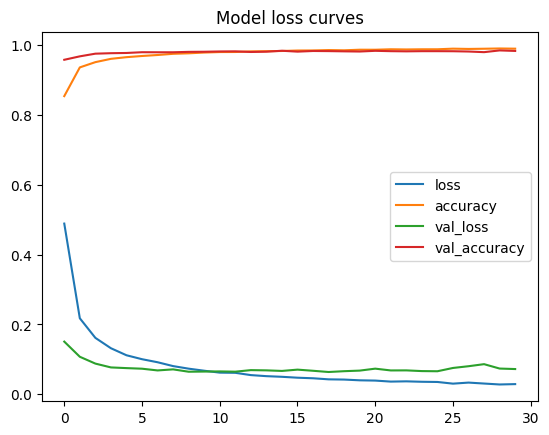

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot()
plt.title("Model loss curves")

#Find the best learning rate:

Learning rate where the loss decreases the most during training.
* A learning rate **callback** - Extra piece un functionality, like a **while**
* Another model
* A modified loss curves plot

In [ ]:
# Build the neural network model
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten layer with input shape of (28, 28)
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Display model architecture
model2.summary()

# Train the model
history2 = model2.fit(train_images, train_labels, epochs=30,
                     batch_size=128, validation_split=0.1,
                     callbacks=[lr_scheduler])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

<Axes: xlabel='epochs'>

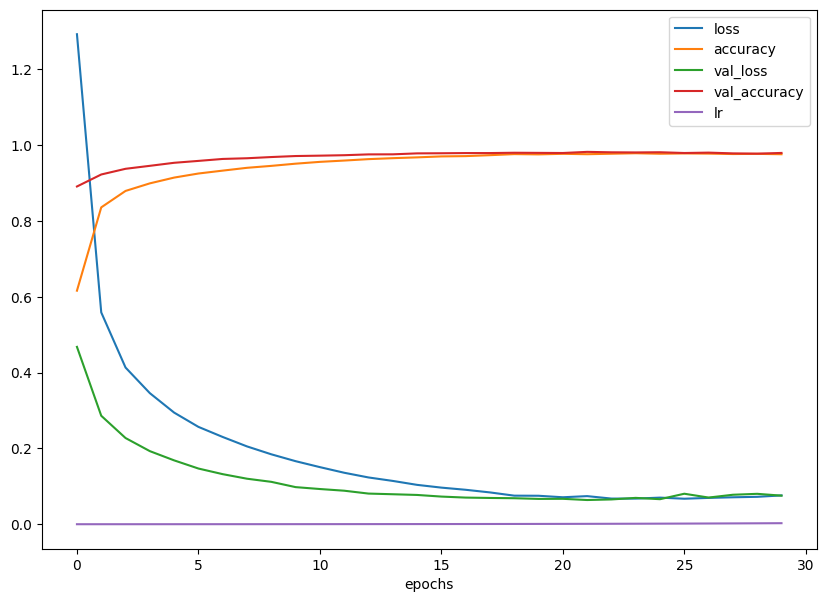

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(10,7), xlabel="epochs")

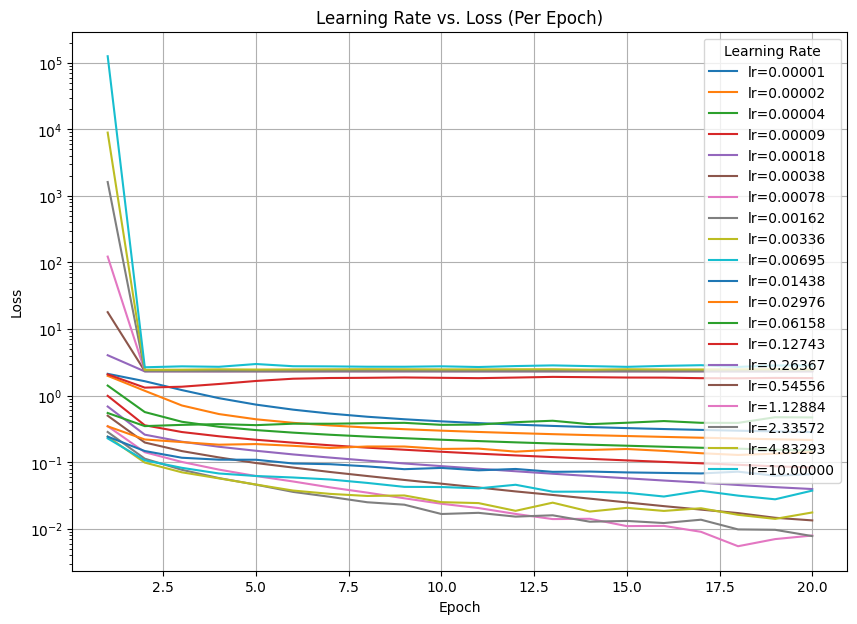

In [ ]:
import numpy as np

# Define a function to create and train a model with a specified learning rate
def create_and_train_model(lr):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model for a fixed number of epochs with dynamic learning rate
    history = model.fit(train_images, train_labels, epochs=20, batch_size=128, verbose=0)

    # Return the training losses at each epoch
    return history.history['loss']

# Define a range of learning rates to explore (logarithmically spaced)
learning_rates = np.logspace(-5, 1, num=20)  # Example: from 1e-5 to 10

# Train models with different learning rates and record the training losses
losses_per_lr = [create_and_train_model(lr) for lr in learning_rates]

# Plot learning rate vs. loss for each epoch iteration
plt.figure(figsize=(10, 7))

for i, lr in enumerate(learning_rates):
    plt.plot(range(1, 21), losses_per_lr[i], label=f"lr={lr:.5f}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss (Per Epoch)")
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.legend(title='Learning Rate')
plt.grid(True)
plt.show()

In [ ]:
# Build the neural network model
model3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten layer with input shape of (28, 28)
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00078),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model3.summary()

# Train the model
history3 = model3.fit(train_images, train_labels, epochs=30,
                     batch_size=128, validation_split=0.1)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_74 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 10

In [ ]:
model3.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9804


[0.07622590661048889, 0.980400025844574]